# Developing Custom Jewelry Detection Model by Transfer Learning on YOLOv5

In [1]:
# Importing required libraries

import torch
import cv2
import requests
import yaml

In [2]:
# Getting basic requirements and dependencies to root session storage

def requirements():

  ''' Installing YOLO v5 on google colab environment '''
  !git clone https://github.com/freedomwebtech/yolov5train
  !unzip /content/yolov5train/yolov5.zip -d /content/yolov5train
  %cd /content/yolov5train/yolov5
  !pip3 install -r requirements.txt

  ''' creating a shortcut to access google drive files and folders '''
  from google.colab import drive
  drive.mount('/content/gdrive')
  !ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
requirements()

Cloning into 'yolov5train'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 963.45 KiB | 7.30 MiB/s, done.
Archive:  /content/yolov5train/yolov5.zip
  inflating: /content/yolov5train/yolov5/benchmarks.py  
   creating: /content/yolov5train/yolov5/classify/
  inflating: /content/yolov5train/yolov5/classify/predict.py  
  inflating: /content/yolov5train/yolov5/classify/train.py  
  inflating: /content/yolov5train/yolov5/classify/val.py  
  inflating: /content/yolov5train/yolov5/CONTRIBUTING.md  
   creating: /content/yolov5train/yolov5/data/
  inflating: /content/yolov5train/yolov5/data/coco.yaml  
   creating: /content/yolov5train/yolov5/data/scripts/
  inflating: /content/yolov5train/yolov5/data/scripts/get_imagenet.sh  
  inflating: /content/yolov5train/yolov5/data/scripts/get_coco128.sh  
  inflating: /con

**Install the zip file of image-label dataset folder inside 'gdrive/MyDrive/'.**

**image-label dataset is created using 'labelimg.py'.**

In [4]:
# Unzipping image-label dataset from 'gdrive/MyDrive/' to '/content/yolov5train'

def unzip_dataset(): 
  try:
    !unzip /content/gdrive/MyDrive/data.zip -d /content/yolov5train
  except:
    print(" image-label dataset folder not found inside 'gdrive/MyDrive/' ")

In [5]:
unzip_dataset()

Archive:  /content/gdrive/MyDrive/data.zip
   creating: /content/yolov5train/data/
   creating: /content/yolov5train/data/images/
   creating: /content/yolov5train/data/images/testing/
  inflating: /content/yolov5train/data/images/testing/01_1024x1024.jpg  
  inflating: /content/yolov5train/data/images/testing/01_1024x1024.txt  
  inflating: /content/yolov5train/data/images/testing/1 (1).jpg  
  inflating: /content/yolov5train/data/images/testing/1 (1).txt  
  inflating: /content/yolov5train/data/images/testing/1.4x1.2cm_unique_design_orange_rhinestone_crystal_magpie_stud_earrings_with_18k_gold_plated_tin_alloy_rose_gold_31604546_1.jpg  
  inflating: /content/yolov5train/data/images/testing/1.4x1.2cm_unique_design_orange_rhinestone_crystal_magpie_stud_earrings_with_18k_gold_plated_tin_alloy_rose_gold_31604546_1.txt  
  inflating: /content/yolov5train/data/images/testing/1.jpg  
  inflating: /content/yolov5train/data/images/testing/1.txt  
  inflating: /content/yolov5train/data/images/t

In [6]:
# Edit dataset.yaml file inside 'yolov5' directory

file_path = '/content/yolov5train/yolov5/dataset.yaml'    # path of dataset.yaml
train_path = '/content/yolov5train/data/images/training/' # path of image-label data used for training
val_path = '/content/yolov5train/data/images/testing/'    # path of image-label data used for testing
num_class = 5                                             # Number of labelling class
class_names = ['WRISTWATCH', 'BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS']

def edit_yaml(file_path=file_path, train_path=train_path, val_path=val_path, num_class=num_class, class_names=class_names):

  try:
    with open(file_path, 'r') as f:
      load = yaml.load(f, Loader = yaml.FullLoader)

    load['train'] = train_path
    load['val'] = val_path
    load['nc'] = num_class
    load['names'] = class_names
    with open(file_path, 'w') as f:
      yaml.dump(load, f)

  except:
    print("yaml file not found")


In [7]:
edit_yaml()

In [8]:
# Training our custom model by running preinstalled 'train.py' file inside 'yolov5' directory

def training():
  !python3 /content/yolov5train/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /content/yolov5train/yolov5/dataset.yaml --weights yolov5s.pt

In [9]:
training()

train: weights=yolov5s.pt, cfg=, data=/content/yolov5train/yolov5/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-10-4 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

In [10]:
# Save best model file 'best.pt' inside our google drive

def save_model():

  '''making new directory inside MyDrive'''
  !mkdir -p /content/gdrive/MyDrive/YOLO_ObjDetection/

  '''copy best model file to new directory'''
  !cp "/content/yolov5train/yolov5/runs/train/exp/weights/best.pt" /content/gdrive/MyDrive/YOLO_ObjDetection/yolo_model.pt

In [11]:
save_model()

In [12]:
# Load the saved model from google drive using 'PyTorch' package

path = '/content/gdrive/MyDrive/YOLO_ObjDetection/yolo_model.pt'

def load_model(path=path):
  model = torch.hub.load('ultralytics/yolov5', 'custom', path, force_reload = True)
  return model

model = load_model(path) # Instatiating function to load model

/usr/local/lib/python3.9/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.

In [15]:
# Predict the detection of jewellery on new image: 

def detect_jewellery(img_path):
  result = model(img_path)
  return result.show()

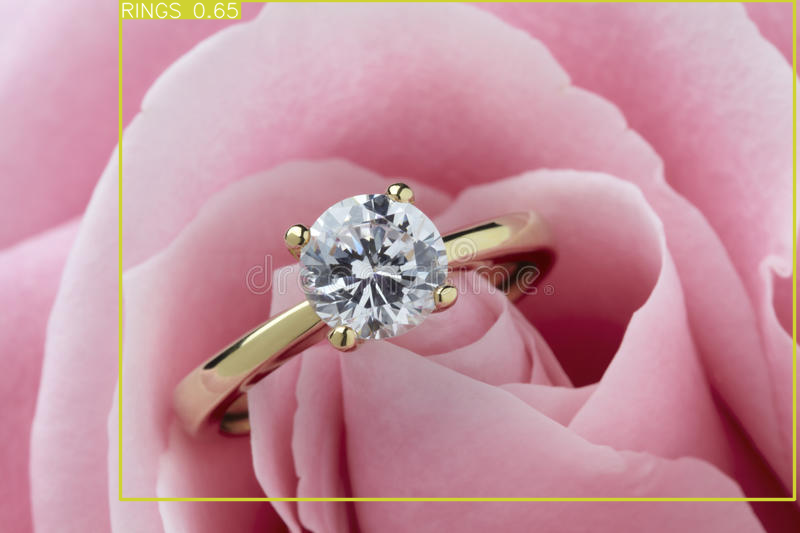

In [17]:
# Testing new images

#1

detect_jewellery('/content/gdrive/MyDrive/diamond-ring.jpg')

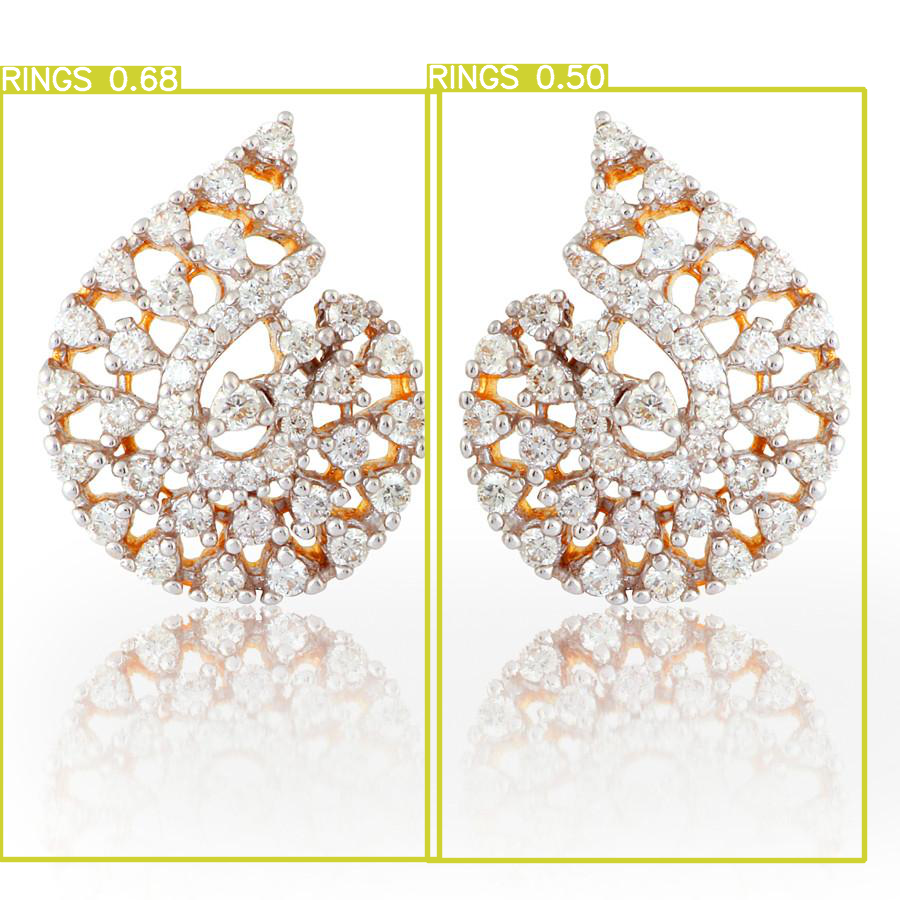

In [16]:
#2

test_img = '/content/gdrive/MyDrive/test_img.jpg'
detect_jewellery(test_img)